In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('clean_v2.csv')

In [3]:
df.head()

,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,Exterior1st,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,SalePrice
0,65.0,8450,Reg,Inside,CollgCr,2Story,7,2003,2003,VinylSd,...,0,Attchd,2003.0,RFn,2,548,0,61,0,208500
1,80.0,9600,Reg,FR2,Veenker,1Story,6,1976,1976,MetalSd,...,1,Attchd,1976.0,RFn,2,460,298,0,0,181500
2,68.0,11250,IR1,Inside,CollgCr,2Story,7,2001,2002,VinylSd,...,1,Attchd,2001.0,RFn,2,608,0,42,0,223500
3,60.0,9550,IR1,Corner,Crawfor,2Story,7,1915,1970,Wd Sdng,...,1,Detchd,1998.0,Unf,3,642,0,35,0,140000
4,84.0,14260,IR1,FR2,NoRidge,2Story,8,2000,2000,VinylSd,...,1,Attchd,2000.0,RFn,3,836,192,84,0,250000


In [4]:
df.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtQual',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'ScreenPorch', 'SalePrice'],
      dtype='object')

In [5]:
snshedf.corr()

NameError: name 'snshedf' is not defined

In [6]:
import plotly

<AxesSubplot:>

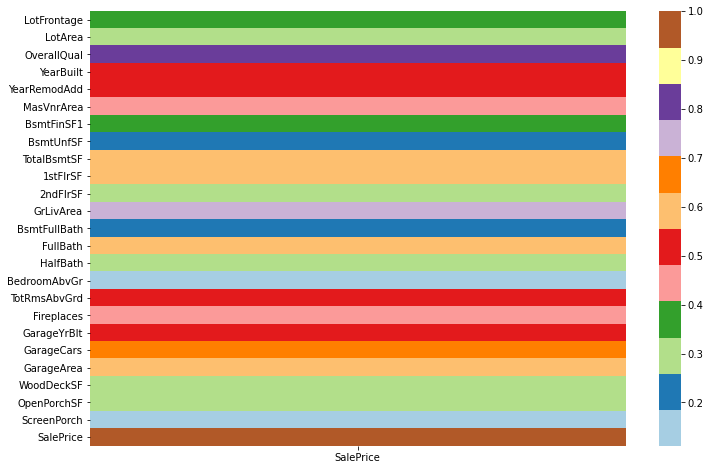

In [7]:
plt.figure(figsize=(12,8))
cm = sns.color_palette("Paired", as_cmap=True)
sns.heatmap(data = df.corr()[['SalePrice']], cmap = cm)



In [8]:
corr = df.corr()

### Dropping insignificant Numerical Columns

In [9]:
num_col_to_drp = list(corr[corr['SalePrice']<0.3].index)

In [11]:
num_col_to_drp = num_col_to_drp[1:]

In [12]:
df.drop(num_col_to_drp, inplace = True, axis = 1)

In [13]:
df.shape

(1460, 35)

In [14]:
final_num_cols = list(df.corr().index)

##### The LotFrontage has more than 200 nan values. Instead of taking LotFrontage we take lotarea into an account

In [ ]:
#final_num_cols.append('LotArea')

In [15]:
final_num_cols = final_num_cols[1:]

In [16]:
final_num_cols 

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

### Taking Significant Categorical Columns

In [17]:
cat_col_to_take = ['MasVnrType', 'ExterQual', 'BsmtQual', 'KitchenQual', 'GarageFinish']

### Finalizing Features

In [18]:
features = final_num_cols + cat_col_to_take

In [19]:
features.append('SalePrice')

In [20]:
features

['LotArea',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'MasVnrType',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'GarageFinish',
 'SalePrice']

In [21]:
len(features)

25

### Final dataset

In [22]:
data = df[features]

In [23]:
data.head()

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MasVnrType,ExterQual,BsmtQual,KitchenQual,GarageFinish,SalePrice
0,8450,7,2003,2003,196.0,706,856,856,854,1710,...,548,0,61,208500,BrkFace,Gd,Gd,Gd,RFn,208500
1,9600,6,1976,1976,0.0,978,1262,1262,0,1262,...,460,298,0,181500,None,TA,Gd,TA,RFn,181500
2,11250,7,2001,2002,162.0,486,920,920,866,1786,...,608,0,42,223500,BrkFace,Gd,Gd,Gd,RFn,223500
3,9550,7,1915,1970,0.0,216,756,961,756,1717,...,642,0,35,140000,None,TA,TA,Gd,Unf,140000
4,14260,8,2000,2000,350.0,655,1145,1145,1053,2198,...,836,192,84,250000,BrkFace,Gd,Gd,Gd,RFn,250000


In [24]:
data.corr().index

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'SalePrice'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
LotArea         1460 non-null int64
OverallQual     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
MasVnrArea      1460 non-null float64
BsmtFinSF1      1460 non-null int64
TotalBsmtSF     1460 non-null int64
1stFlrSF        1460 non-null int64
2ndFlrSF        1460 non-null int64
GrLivArea       1460 non-null int64
FullBath        1460 non-null int64
TotRmsAbvGrd    1460 non-null int64
Fireplaces      1460 non-null int64
GarageYrBlt     1379 non-null float64
GarageCars      1460 non-null int64
GarageArea      1460 non-null int64
WoodDeckSF      1460 non-null int64
OpenPorchSF     1460 non-null int64
SalePrice       1460 non-null int64
MasVnrType      1460 non-null object
ExterQual       1460 non-null object
BsmtQual        1423 non-null object
KitchenQual     1460 non-null object
GarageFinish    1379 non-null object
SalePrice       1460

In [31]:
data.to_csv('clean_v3.csv', index = False)

In [26]:
test = data.dropna()

In [27]:
test

,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,...,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MasVnrType,ExterQual,BsmtQual,KitchenQual,GarageFinish,SalePrice
0,8450,7,2003,2003,196.0,706,856,856,854,1710,...,548,0,61,208500,BrkFace,Gd,Gd,Gd,RFn,208500
1,9600,6,1976,1976,0.0,978,1262,1262,0,1262,...,460,298,0,181500,None,TA,Gd,TA,RFn,181500
2,11250,7,2001,2002,162.0,486,920,920,866,1786,...,608,0,42,223500,BrkFace,Gd,Gd,Gd,RFn,223500
3,9550,7,1915,1970,0.0,216,756,961,756,1717,...,642,0,35,140000,None,TA,TA,Gd,Unf,140000
4,14260,8,2000,2000,350.0,655,1145,1145,1053,2198,...,836,192,84,250000,BrkFace,Gd,Gd,Gd,RFn,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,0.0,0,953,953,694,1647,...,460,0,40,175000,None,TA,Gd,TA,RFn,175000
1456,13175,6,1978,1988,119.0,790,1542,2073,0,2073,...,500,349,0,210000,Stone,TA,Gd,TA,Unf,210000
1457,9042,7,1941,2006,0.0,275,1152,1188,1152,2340,...,252,0,60,266500,None,Ex,TA,Gd,RFn,266500
1458,9717,5,1950,1996,0.0,49,1078,1078,0,1078,...,240,366,0,142125,None,TA,TA,Gd,Unf,142125


In [30]:
data['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64